<a href="https://www.kaggle.com/code/stefansanchez26/churn-bank?scriptVersionId=159112315" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import os
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark")
sns.set_palette("viridis")

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

<div id="1" style="background-color: #1a1a1a; padding: 10px; border-radius: 10px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #fff; font-weight: bold; font-size: 42px;">
    Dataset Overview
    </h1>
</div>

In [2]:
sample_data=pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")
train_data=pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv",index_col="id")
test_data=pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv",index_col="id")

In [3]:
orig_data = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv",index_col = "RowNumber")
orig_data.dropna(inplace=True)
train_data = pd.concat([train_data,orig_data])
train_data.reset_index(drop=True,inplace=True)

In [4]:
sample_data.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [5]:
train_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
test_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [7]:
print("train shappe: ", train_data.shape, "test shape: ", test_data.shape)

train shappe:  (175032, 13) test shape:  (110023, 12)


In [8]:
train_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.750320e+05,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000
mean,1.569194e+07,656.115945,38.171265,5.019933,56677.821792,1.553070,0.751188,0.498743,111862.236392,0.211156
std,7.142820e+04,81.149591,8.969537,2.811133,62982.219148,0.549211,0.432326,0.500000,50815.188500,0.408130
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563288e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,73214.330000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,116969.730000,0.000000
75%,1.575666e+07,710.000000,42.000000,7.000000,120727.970000,2.000000,1.000000,1.000000,154767.340000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [9]:
train_data.Exited.value_counts()

Exited
0    138073
1     36959
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_enc = LabelEncoder()

train_data["Gender"] = label_enc.fit_transform(train_data[["Gender"]])
test_data["Gender"] = label_enc.transform(test_data[["Gender"]])
train_data["Geography"] = label_enc.fit_transform(train_data[["Geography"]])
test_data["Geography"] = label_enc.transform(test_data[["Geography"]])
train_data["Surname"] = label_enc.fit_transform(train_data[["Surname"]])
test_data["Surname"] = label_enc.transform(test_data[["Surname"]])

train_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,2023,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,2024,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,1236,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,1362,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,491,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


<div id="1" style="background-color: #1a1a1a; padding: 10px; border-radius: 10px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #fff; font-weight: bold; font-size: 42px;">
    Exoploratory Data Analysis
    </h1>
</div>

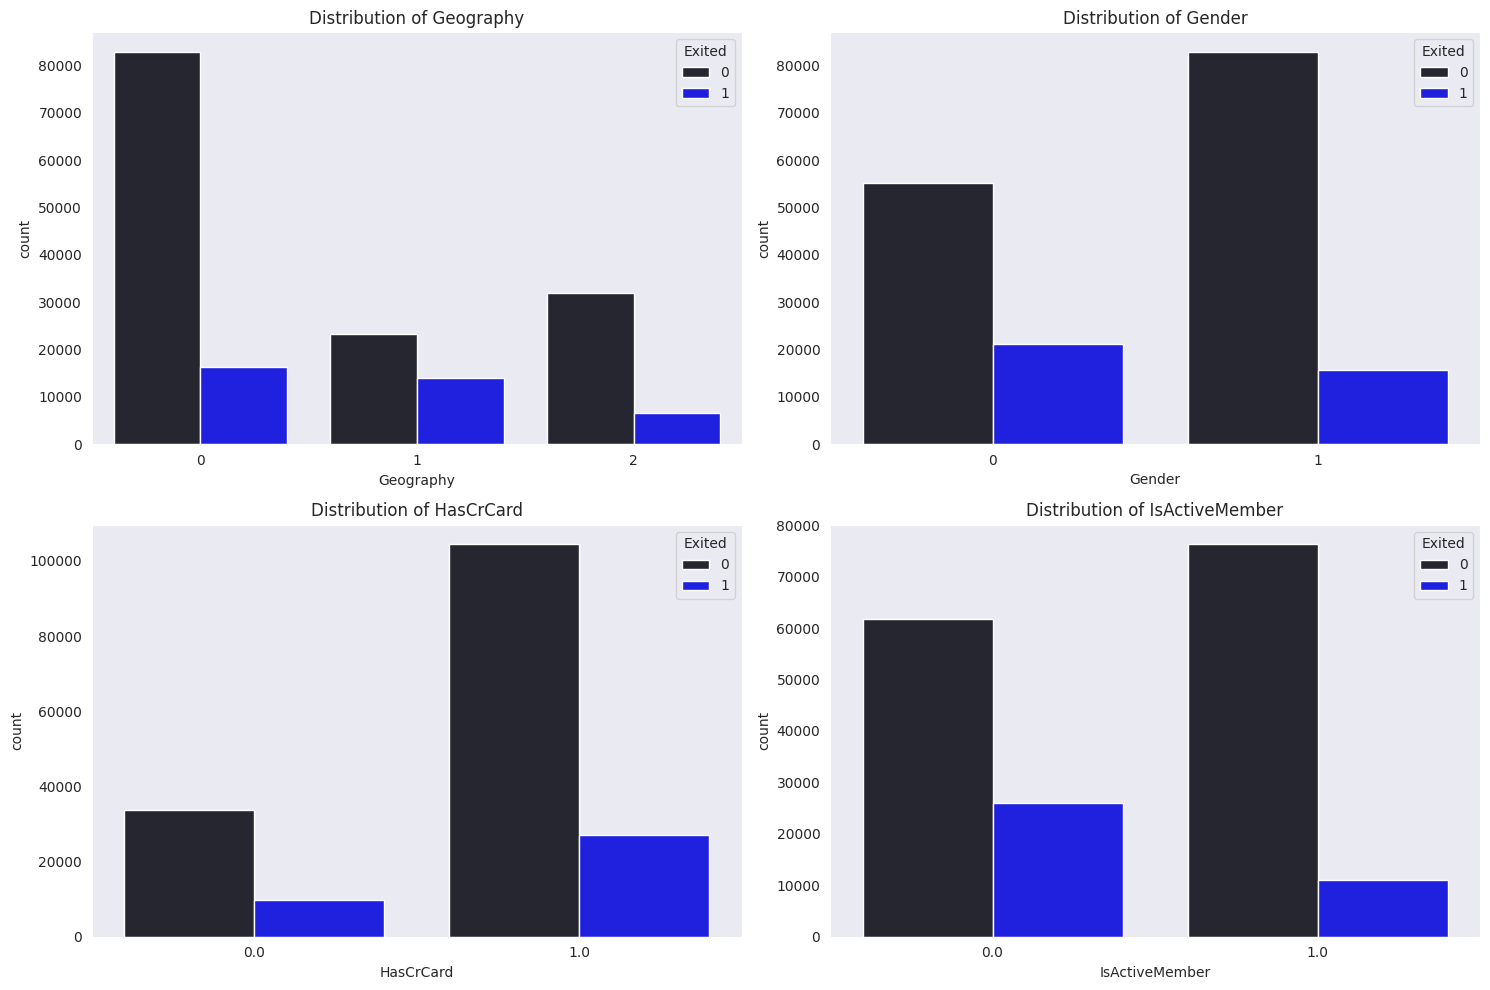

In [11]:
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
sns.dark_palette("#69d", reverse=True, as_cmap=True)
# rows of subplots
num_rows = len(categorical_columns) // 2 + len(categorical_columns) % 2

plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.countplot(data=train_data, x=column, hue='Exited', palette='dark:blue') 
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

<div id="1" style="background-color: #1a1a1a; padding: 10px; border-radius: 10px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #fff; font-weight: bold; font-size: 42px;">
    Models
    </h1>
</div>

In [12]:
X_train=train_data.iloc[:, :-1]
y_train=train_data["Exited"]

In [13]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [14]:
def find_best_rf_parameters(X, y, param_grid, cv=5):
    """
    Find the best parameters for a Random Forest Classifier using Grid Search.

    Parameters:
    - X: Features
    - y: Target variable
    - param_grid: Dictionary with hyperparameter values to search
    - cv: Number of cross-validation folds

    Returns:
    - Best parameters for the Random Forest Classifier
    """

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Random Forest Classifier
    rf_classifier = RandomForestClassifier()

    # Use Grid Search to find the best parameters
    grid_search = GridSearchCV(rf_classifier, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Print the best parameters and their corresponding accuracy
    print("Best Parameters: ", grid_search.best_params_)
    print("Best AUC: {:.2f}%".format(grid_search.best_score_ * 100))

    # Evaluate the model on the test set
    test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
    print("Test Set AUC: {:.2f}%".format(test_accuracy * 100))

    return grid_search.best_params_




In [15]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
best_params = find_best_rf_parameters(X_train, y_train, param_grid)

Best Parameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best AUC: 88.58%
Test Set AUC: 86.11%


In [16]:
random_forest_clf = RandomForestClassifier(max_depth = 10, min_samples_split = 2, n_estimators= 200)

random_forest_clf.fit(X=X_train, y=y_train)


predictions = random_forest_clf.predict_proba(test_data)[:, 1]  

sample_data['Exited'] = predictions
sample_data.to_csv('submission.csv', index=False)

In [17]:
sample_data.head()

,id,Exited
0,165034,0.026310
1,165035,0.823603
2,165036,0.046920
3,165037,0.244000
4,165038,0.300320
